# Features retrieval

## Instruments used

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import pickle
from os import path, listdir
from essentia.standard import MonoLoader, OnsetDetection, FrameGenerator
from essentia.standard import Energy, ZeroCrossingRate
from essentia.standard import FFT, Centroid, Spectrum, CentralMoments, DistributionShape, Windowing, MFCC
from IPython.display import Audio
from ipywidgets import FloatProgress
from matplotlib.colors import ListedColormap
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## The data

Let's separete two instruments from the training to see if we can use the stated features. First, we need to retrieve the waveforms from files and define the functions to extract features.

In [2]:
fr = 44100.0
list_of_inst = ['cel', 'cla', 'flu', 'gac', 'gel', 'org', 'pia', 'sax', 'tru', 'vio']
list_for_try = ['pia', 'vio', 'gac']

In [3]:
window = Windowing()
zcr = ZeroCrossingRate()
energy = Energy()
spectrum = Spectrum()
centroid = Centroid()
cm = CentralMoments()
dshape = DistributionShape()
mfcc = MFCC()

def get_frames(audio, fr = 44100., fs = 0.33):
    return [audio[(x / 2) * 2:((x+int(fr * fs)) / 2 ) * 2] for x in [k * int(fr * fs) for k in range(int(1 / fs))]]

def get_features(frame):
    spec = spectrum(window(frame))
    bands, coefs = mfcc(spec)
    res = [zcr(frame), energy(frame), centroid(spec)]
    res.extend(dshape(cm(spec)))
    res.extend(bands)
    res.extend(coefs)
    res.extend([bands.mean(), coefs.mean()])
    return res

In [4]:
with open('pia', 'r') as ftr:
    pia = pickle.load(ftr)

In [5]:
pia_features = []

for audio in pia:
    for frame in get_frames(audio):
        pia_features.append(get_features(frame))
    
pia = None
        
print np.asmatrix(pia_features)[:2]

[[  3.60775143e-02   1.83438049e+02   1.02643810e-01   2.09043790e-02
    2.29551792e+00   4.94401217e+00   3.99257988e-05   2.68272852e-04
    1.73760909e-05   1.43148471e-04   3.63988147e-05   4.07258703e-05
    6.68376015e-05   3.41973682e-05   5.48549679e-06   3.37235077e-04
    1.93194690e-04   8.10398433e-06   4.81712686e-06   3.67512052e-06
    1.80874463e-06   3.05299873e-05   6.46570743e-06   1.63601715e-06
    6.50633183e-07   1.44371043e-05   5.13180703e-06   4.81726147e-07
    5.43702015e-07   5.80732149e-07   4.06217850e-07   7.31310422e-07
    4.11717480e-07   1.47000151e-07   1.17272762e-07   1.74699494e-07
    2.09172953e-07   7.34163308e-08   6.16128020e-08   3.08090229e-08
    1.71206693e-08   3.64038719e-08   5.55371322e-08   1.58200066e-08
    2.59511452e-08   1.25521549e-08  -7.34978455e+02   1.53786118e+02
   -7.94714355e+00   7.38584328e+00  -4.58565521e+00  -3.47800064e+00
   -4.31788826e+00   6.26945496e-02   1.06368942e+01   8.78195953e+00
   -1.45182800e+00  

In [6]:
with open('vio', 'r') as ftr:
    vio = pickle.load(ftr)

In [7]:
vio_features = []

for audio in vio:
    for frame in get_frames(audio):
        vio_features.append(get_features(frame))
    
vio = None
        
print np.asmatrix(vio_features)[:2]

[[  7.58658573e-02   5.05895157e+01   1.21517457e-01   1.88518781e-02
    1.99972916e+00   4.36803484e+00   2.04621283e-05   2.47242388e-05
    3.93308583e-05   1.47153751e-05   1.22492611e-05   6.05858258e-06
    1.83513457e-05   2.79909291e-05   1.06444468e-05   7.52693040e-06
    1.65770962e-06   5.94037238e-06   1.70680905e-05   7.37695063e-06
    1.92973203e-05   4.57948590e-06   4.67044219e-06   4.01911984e-06
    4.52728091e-06   4.39387350e-06   1.01280023e-06   1.06883817e-06
    1.41339910e-06   6.05506102e-06   3.97429176e-07   5.93976154e-07
    4.38714153e-07   3.96864743e-06   5.59789783e-07   1.82101402e-07
    1.29208772e-07   1.02600993e-07   7.47645572e-08   4.01363529e-08
    4.06173406e-08   2.26623467e-08   1.24970052e-08   2.26650663e-08
    1.22304993e-08   8.73576855e-09  -7.45674500e+02   1.25464050e+02
   -3.51583633e+01   1.98702431e+01  -4.07172012e+00   7.33370972e+00
    7.47341919e+00  -5.44004059e+00  -4.30795860e+00   2.32893753e+00
    3.44112396e-01  

In [8]:
with open('tru', 'r') as ftr:
    tru = pickle.load(ftr)

In [9]:
tru_features = []

for audio in tru:
    for frame in get_frames(audio):
        tru_features.append(get_features(frame))
    
tru = None
        
print np.asmatrix(tru_features)[:2]

[[  3.99257839e-02   3.71300354e+01   5.15925959e-02   2.36685714e-03
    3.83453751e+00   3.51257973e+01   1.05887384e-05   2.42232145e-05
    1.58021874e-06   1.79125072e-05   2.10813996e-05   1.08208997e-05
    3.83714687e-05   1.35088703e-05   8.17717773e-06   6.02552518e-06
    2.16626518e-06   3.04176183e-06   5.30084253e-06   1.36903745e-05
    4.05373976e-06   2.08379402e-06   1.53317626e-06   2.64731148e-06
    1.57319187e-06   8.20206481e-07   5.73561124e-07   1.56931875e-07
    2.13874671e-07   9.08474789e-08   2.29894841e-08   9.71629976e-09
    6.68295819e-09   2.79150747e-09   1.21909860e-09   4.85613827e-10
    3.36039890e-10   3.06775660e-10   8.18501933e-11   2.15535489e-11
    7.79879564e-11   3.44038492e-10   2.38404213e-10   1.18624251e-11
    5.09199006e-14   3.43928919e-14  -8.60454590e+02   2.09566406e+02
   -2.89573326e+01  -2.71510696e+01   2.25672150e+01  -4.32770538e+00
   -1.12954254e+01  -1.19651031e+00  -7.91789246e+00  -4.52239990e+00
    3.32164383e+00  

In [11]:
labels = np.hstack([np.zeros(len(pia_features)), np.ones(len(vio_features)), np.ones(len(tru_features)) * 2])

print labels

[ 0.  0.  0. ...,  2.  2.  2.]


In [13]:
feature_table = np.vstack([pia_features, vio_features, tru_features])

print feature_table.shape

(5634, 61)


In [14]:
dataset = pd.DataFrame.from_records(feature_table, columns =
                                    [x for subarr in [['ZCR'],
                                                      ['Energy'],
                                                      ['Centroid'],
                                                      ['Variance'],
                                                      ['Skewness'],
                                                      ['Kurtosis'],
                                                      ['MFCC%d' % i for i in xrange(53)],
                                                      ['Bands mean'],
                                                      ['Coefs mean']] for x in subarr])
dataset['Label'] = labels
dataset

,ZCR,Energy,Centroid,Variance,Skewness,Kurtosis,MFCC0,MFCC1,MFCC2,MFCC3,...,MFCC46,MFCC47,MFCC48,MFCC49,MFCC50,MFCC51,MFCC52,Bands mean,Coefs mean,Label
0,0.036078,183.438049,0.102644,0.020904,2.295518,4.944012,3.992580e-05,2.682729e-04,1.737609e-05,1.431485e-04,...,-4.317888,0.062695,10.636894,8.781960,-1.451828,-4.899853,-11.062172,3.160468e-05,-45.543648,0.0
1,0.037859,238.740067,0.148040,0.037430,1.451289,0.937716,3.993045e-05,3.577857e-04,7.270914e-05,4.461014e-04,...,-22.130877,-10.796965,-3.485476,-3.917849,2.956846,2.420080,1.201038,5.130845e-05,-43.687778,0.0
2,0.027213,163.237274,0.096119,0.021280,2.264486,4.693029,9.556579e-06,1.088529e-04,5.342291e-05,2.099346e-04,...,-19.733459,-17.321972,-11.024099,-4.753197,-1.890207,-0.158321,-6.193375,2.719265e-05,-49.838921,0.0
3,0.027007,82.592285,0.038084,0.001752,5.027543,55.986683,2.031556e-07,2.562942e-05,2.265852e-05,1.259209e-04,...,-16.155014,-17.668259,-15.206062,-5.731125,-5.624029,-12.297142,-19.042751,1.491896e-05,-60.735878,0.0
4,0.021369,16.459763,0.035932,0.001907,6.021996,81.911407,8.872411e-08,3.571334e-05,1.678531e-05,1.276734e-05,...,-16.280533,-11.481476,-12.981346,-13.483467,-5.468725,-8.662193,-16.425907,3.310415e-06,-62.804276,0.0
5,0.028381,63.259220,0.049502,0.003612,3.364254,18.323824,3.246529e-07,1.042548e-04,5.625260e-05,1.413158e-04,...,-12.975304,-3.994621,-11.270844,-0.548561,-1.319790,-8.911079,-27.346298,1.408567e-05,-56.305035,0.0
6,0.041231,16.485949,0.089987,0.008427,1.607923,3.106617,6.039038e-06,6.843381e-06,5.297608e-06,2.114565e-06,...,-9.105568,8.639856,7.074963,3.500969,-8.375486,12.239708,13.033760,2.860289e-06,-53.353519,0.0
7,0.043356,24.942375,0.082210,0.006114,2.123326,7.487558,3.401799e-06,9.775375e-06,1.119575e-06,1.210885e-06,...,-12.395447,13.157160,0.484573,-9.594376,2.653194,6.208168,10.945572,3.785362e-06,-55.760231,0.0
8,0.036833,16.561930,0.091303,0.009366,1.689276,3.807339,3.275100e-06,6.192425e-06,1.944019e-06,7.528803e-07,...,-19.248657,7.505693,13.201366,0.157883,-9.641714,11.720505,3.354309,1.336364e-06,-56.657612,0.0
9,0.033397,15.878345,0.061348,0.007499,4.431779,25.174549,4.095123e-07,5.786986e-07,6.688727e-07,5.033122e-07,...,-25.612862,5.732079,6.956806,-4.982788,-5.152813,-6.226357,-4.475021,3.548364e-06,-66.011505,0.0


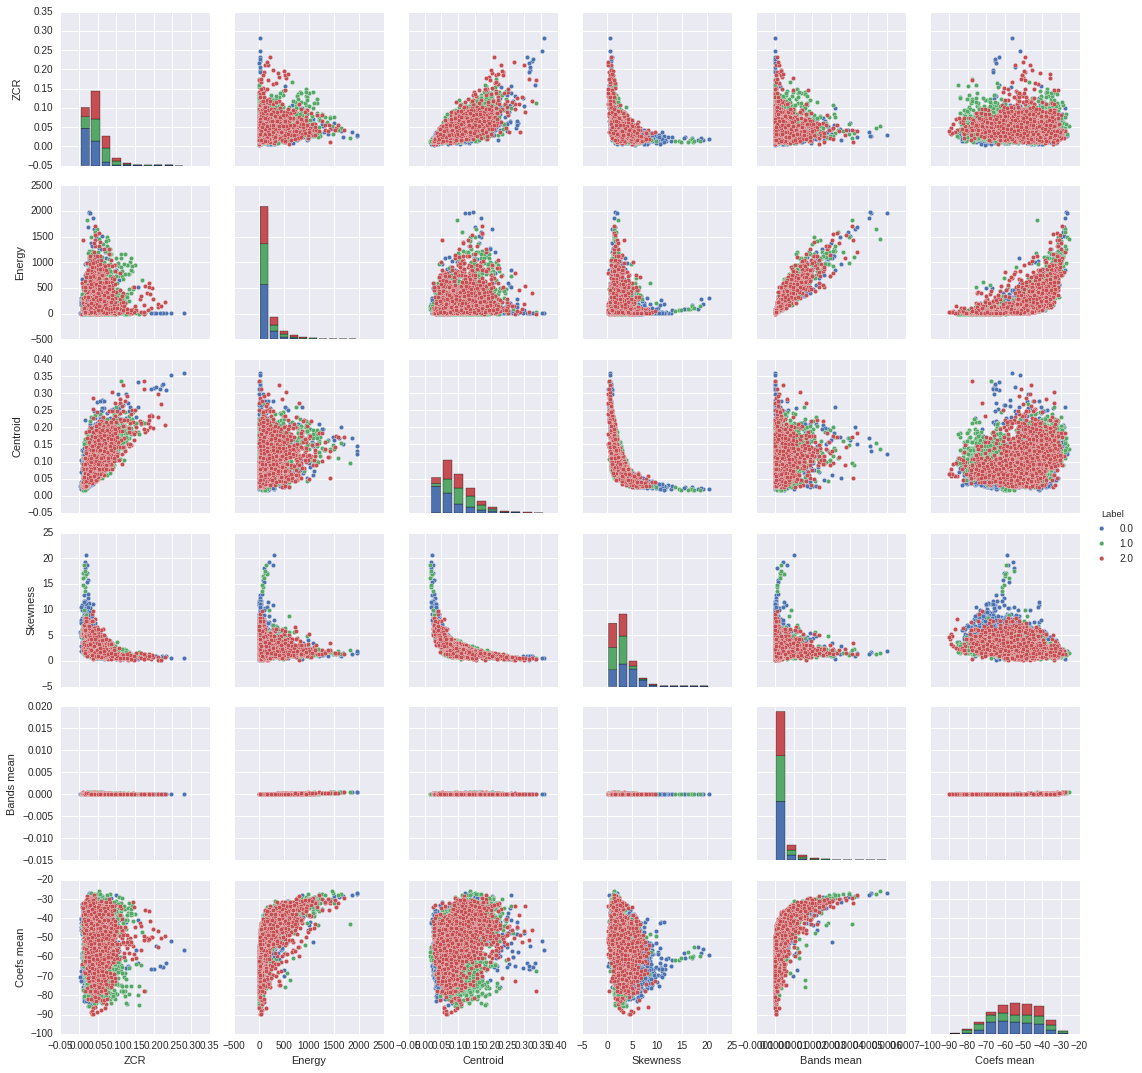

In [15]:
pairgrid = sns.pairplot(dataset, hue = 'Label', vars = ['ZCR', 'Energy', 'Centroid', 'Skewness', 'Bands mean', 'Coefs mean'])
pairgrid.savefig('pairplot.png')

In [16]:
with open('thebestclasses.csv', 'w') as ftw:
    dataset.to_csv(ftw)